In [6]:
import seaborn  # Makes the graphs look better
import numpy as np
import pandas as pd
from matplotlib.ticker import FuncFormatter
%matplotlib inline

In [70]:
def nsw_public_trust(amt):
    fee = 0
    bucket1amt = min(amt, 100000)
    fee += bucket1amt * 0.044
    amt -= bucket1amt
    
    bucket2amt = min(amt, 100000)
    fee += bucket2amt * 0.0385
    amt -= bucket2amt
    
    bucket3amt = min(amt, 100000)
    fee += bucket3amt * 0.0275
    amt -= bucket3amt
    
    fee += amt * 0.0165
    
    # Minimum $220 Fee
    return max(fee, 220)

def australian_executor_trustees(amt):
    fee = 0
    bucket1amt = min(amt, 500000)
    fee += bucket1amt * 0.04
    amt -= bucket1amt
    
    bucket2amt = min(amt, 500000)
    fee += bucket2amt * 0.03
    amt -= bucket2amt
        
    fee += amt * 0.01
    
    # Minimum $5000 Fee
    return max(fee, 5000)

def equity_trustees(amt):
    fee = 0
    bucket1amt = min(amt, 1e6)
    fee += bucket1amt * 0.0385
    amt -= bucket1amt
    
    bucket2amt = min(amt, 1e6)
    fee += bucket2amt * 0.0176
    amt -= bucket2amt

    bucket3amt = min(amt, 3e6)
    fee += bucket3amt * 0.0099
    amt -= bucket3amt
       
    fee += amt * 0.0055
    
    # Minimum $5000 Fee
    return max(fee, 5000)

def perpetual(amt):
    fee = 0
    bucket1amt = min(amt, 1e6)
    fee += bucket1amt * 0.055
    amt -= bucket1amt
    
    bucket2amt = min(amt, 2e6)
    fee += bucket2amt * 0.033
    amt -= bucket2amt

    bucket3amt = min(amt, 3e6)
    fee += bucket3amt * 0.022
    amt -= bucket3amt
       
    fee += amt * 0.0165
    
    # Minimum $5000 Fee
    return max(fee, 5000)

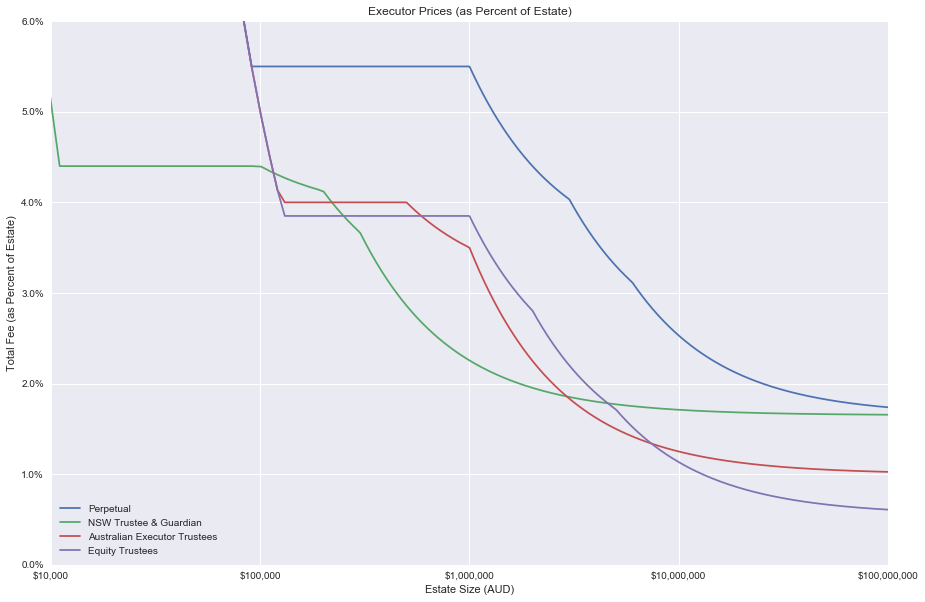

In [76]:
df = pd.DataFrame({
    "amt":pd.Series(np.arange(1000,1e9+1,10000))
})
df["nsw"] = df["amt"].apply(nsw_public_trust)
df["aet"] = df["amt"].apply(australian_executor_trustees)
df["eqt"] = df["amt"].apply(equity_trustees)
df["per"] = df["amt"].apply(perpetual)

df["NSW Trustee & Guardian"]       = df["nsw"] / df["amt"]
df["Australian Executor Trustees"] = df["aet"] / df["amt"]
df["Equity Trustees"]              = df["eqt"] / df["amt"]
df["Perpetual"]                    = df["per"] / df["amt"]

ax = df.plot(
    x="amt",
    y=[
        "Perpetual",
        "NSW Trustee & Guardian",
        "Australian Executor Trustees",
        "Equity Trustees",
    ],
    figsize=(15, 10),
    title="Executor Prices (as Percent of Estate)",
    logx=True,
    ylim=[0, 0.06],
    xlim=[1e4, 1e8],
)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y)))
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '$' + format(int(x), ',')))
ax.set_xlabel("Estate Size (AUD)")
ax.set_ylabel("Total Fee (as Percent of Estate)")